# Creation of all plots in paper
This notebook do the following:
1. sync all files, stack all runs, save references
2. non-linear scale for chameleon
3. matter power spectrum


## Syncing
File are copied from `koios:/home/users/vrastil/GIT/FastSim-Jobs/output/` and saved to `/home/michal/Documents/GIT/FastSim/jobs/output/`

In [1]:
import os
os.system("gnome-terminal -e 'bash -c \"/home/michal/Documents/GIT/FastSim/jobs/KOIOS/sync.sh all\" '")

0

## Stack everything

In [2]:
import simpy.power as pwr
import simpy.data as dt
import simpy.plot as pt
from simpy.struct import *

from scipy import interpolate
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
in_dir = '/home/michal/Documents/GIT/FastSim/jobs/output/'
out_dir = '/home/michal/Documents/GIT/FastSim/report/clanek/'
stack_infos = dt.stack_all(in_dir=in_dir, return_stack=True, verbose=False)
results = Results(in_dir)
results.info()

CHI:  N_m = 256  N_M = 512  N_p = 256^3  L = 1000 Mpc/h  \phi_s = 1.0e-05  (lin)	num runs = 20
CHI:  N_m = 256  N_M = 512  N_p = 256^3  L = 1000 Mpc/h  \phi_s = 1.0e-05  (nl) 	num runs = 4
CHI:  N_m = 256  N_M = 512  N_p = 256^3  L = 2000 Mpc/h  \phi_s = 1.0e-06  (nl) 	num runs = 20
CHI:  N_m = 256  N_M = 512  N_p = 256^3  L = 2000 Mpc/h  \phi_s = 1.0e-05  (lin)	num runs = 99
CHI:  N_m = 256  N_M = 512  N_p = 256^3  L = 2000 Mpc/h  \phi_s = 1.0e-05  (nl) 	num runs = 24
CHI:  N_m = 256  N_M = 512  N_p = 256^3  L = 2000 Mpc/h  \phi_s = 1.0e-05  (lin)	num runs = 100
CHI:  N_m = 256  N_M = 512  N_p = 256^3  L = 2000 Mpc/h  \phi_s = 1.0e-06  (lin)	num runs = 100
CHI:  N_m = 256  N_M = 512  N_p = 256^3  L = 2000 Mpc/h  \phi_s = 1.0e-05  (nl) 	num runs = 20
CHI:  N_m = 256  N_M = 512  N_p = 256^3  L = 2000 Mpc/h  \phi_s = 1.0e-04  (nl) 	num runs = 20
CHI:  N_m = 256  N_M = 512  N_p = 256^3  L = 2000 Mpc/h  \phi_s = 1.0e-05  (lin)	num runs = 120
CHI:  N_m = 256  N_M = 512  N_p = 256^3  L = 200

## Non-linear scale for chameleon

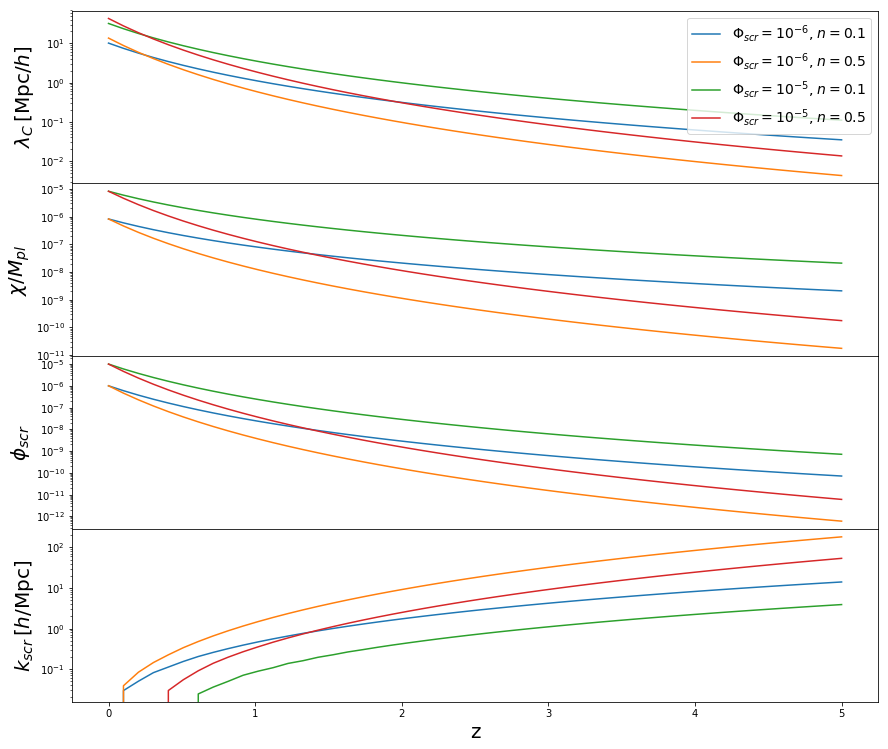

In [3]:
CHI_file = [si.file for si in stack_infos if si.app == 'CHI'][0]
n = [0.1,0.5]
phi = [10**(-6), 10**(-5)]
dt.plot_chi_wave_pot(a_file=CHI_file, outdir=out_dir, n=n, phi=phi)

## Matter Power Spectrum
1. stack runs of the same approximations together (increase resolution range)
2. plot power spectrum at $z=0$ with all approximation, cut to see difference at small scales
3. plot power spectrum relative difference at different redshifts, cut to $k_{nq}/2$
4. plot power spectrum suppresion at three different scales
% 5. plot slope of the power spectrum

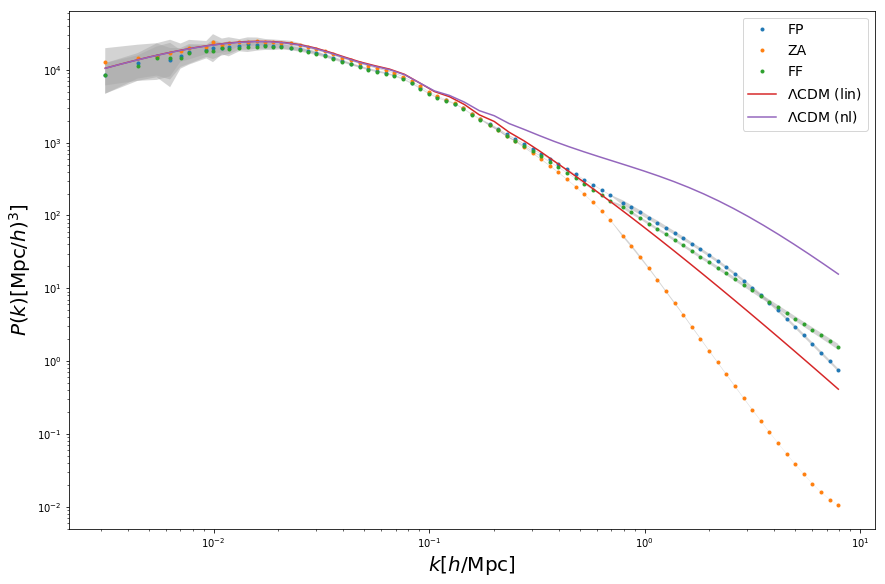

In [10]:
non_chi_stack_infos = results.get_subfiles(NM=1024, app_not='CHI')
dt.get_plot_mlt_pk_broad(non_chi_stack_infos, out_dir=out_dir + 'pwr_spec/', z=0)

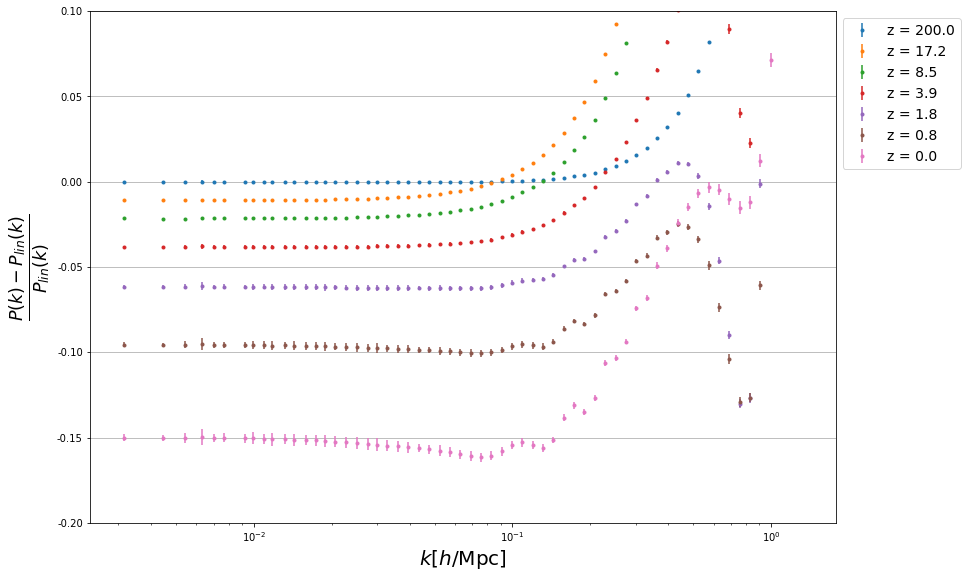

Large-scale: 0.0031,0.0031
Medium-scale: 0.0276,0.0276
Small-scale: 0.1439,0.1439


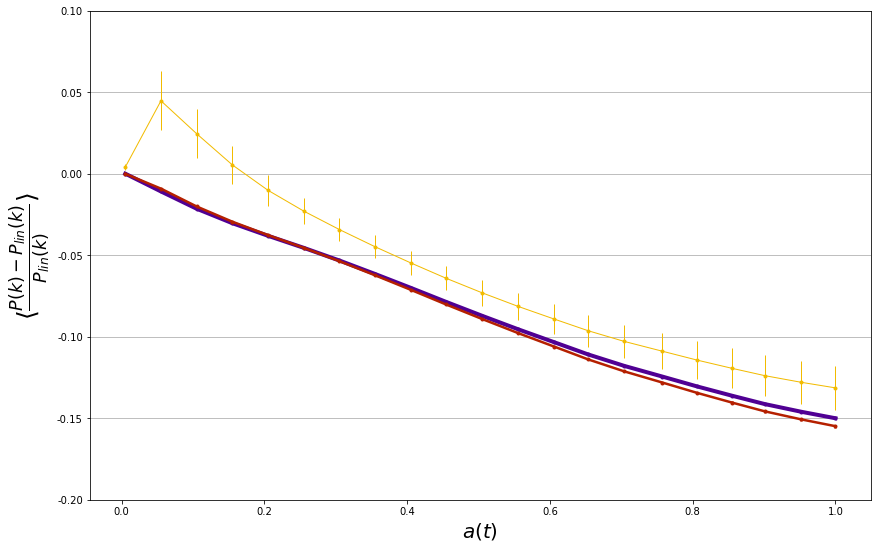

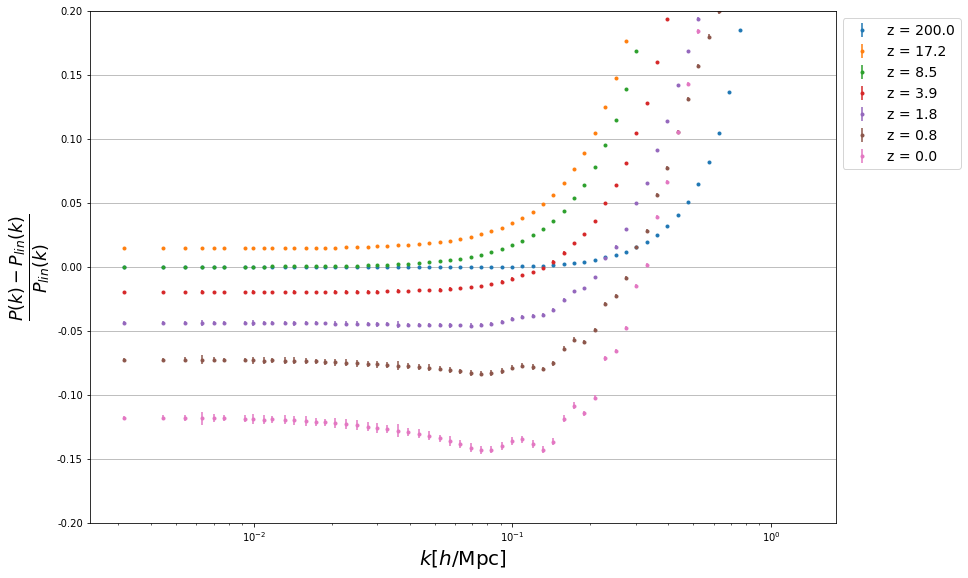

Large-scale: 0.0031,0.0031
Medium-scale: 0.0276,0.0276
Small-scale: 0.1439,0.1439


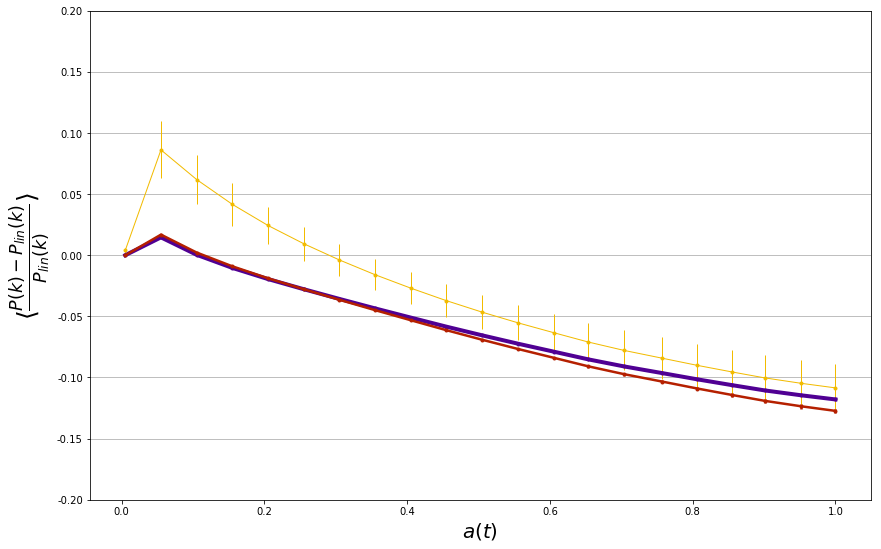

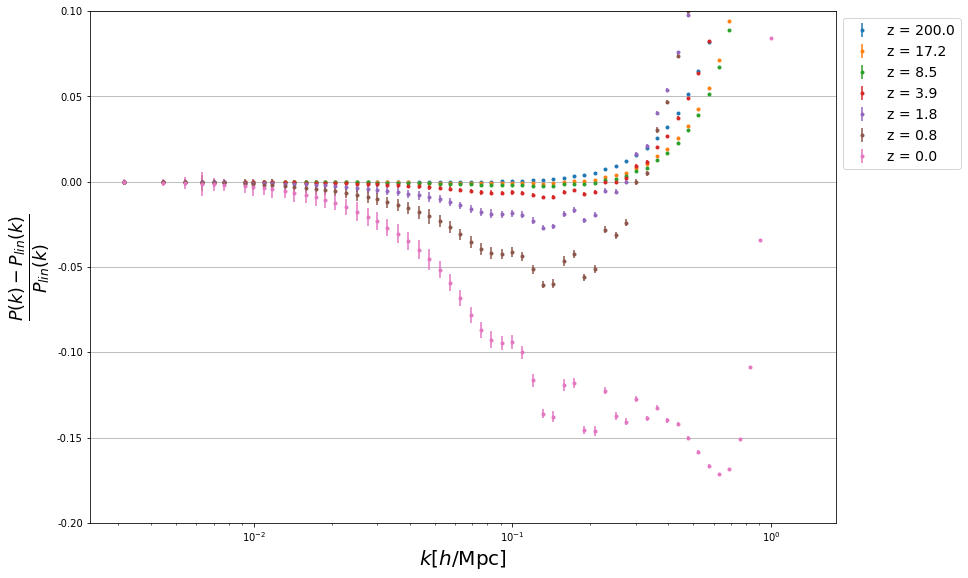

Large-scale: 0.0031,0.0031
Medium-scale: 0.0276,0.0276
Small-scale: 0.1439,0.1439


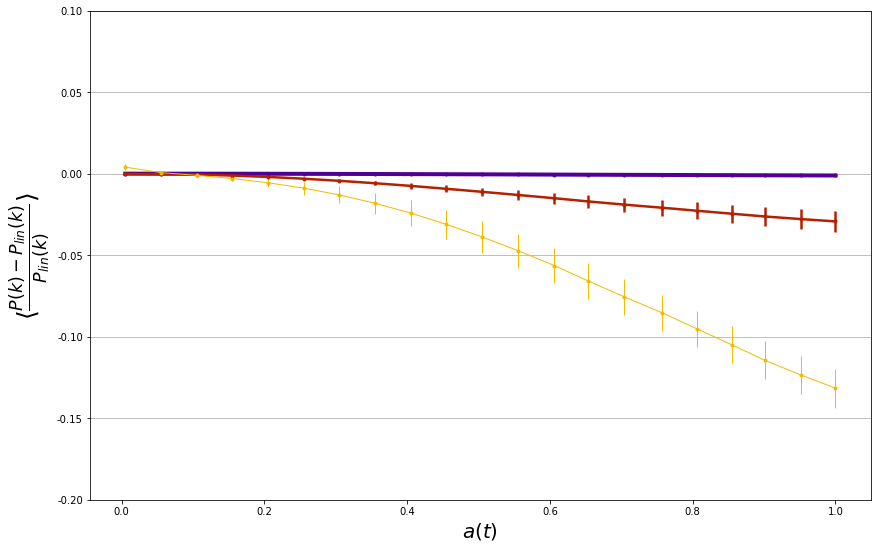

In [5]:
non_chi_stack_infos = results.get_subfiles(NM=1024, L=2000, app_not='CHI')
for a_sim_info in non_chi_stack_infos:
    # data
    zs, files = dt.try_get_zs_files(a_sim_info, "pwr_diff", '*input*')
    a = [1./(z+1.) for z in zs if z != 'init']
    data_list = [np.transpose(np.loadtxt(a_file)) for a_file in files]
    supp = dt.load_k_supp(files, a_sim_info.k_nyquist["particle"], a_sim_info=a_sim_info, a=a)
    
    # plots -- diff, supp 
    pt.plot_pwr_spec_diff_from_data(data_list, zs, a_sim_info, out_dir=out_dir + 'pwr_spec/', show_scales=False,
                                 ext_title='init', show=True, add_app=True, max_nyquist=True)
    
    
    pt.plot_supp_lms(supp, a, a_sim_info, out_dir=out_dir + 'pwr_spec/', show=True, add_app=True, scale_in_leg=False)
    
    

## Effective redshift
1. get $a_{eff}$ for each (non-chi) stack_info
2. plot both $P(k)$--type and $\sigma_R$--type
3. plot growth rate $f$

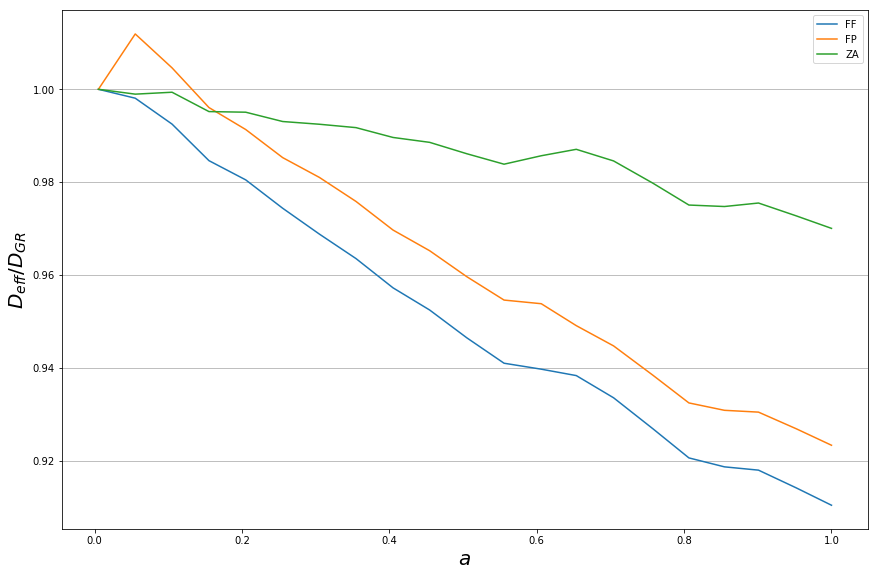

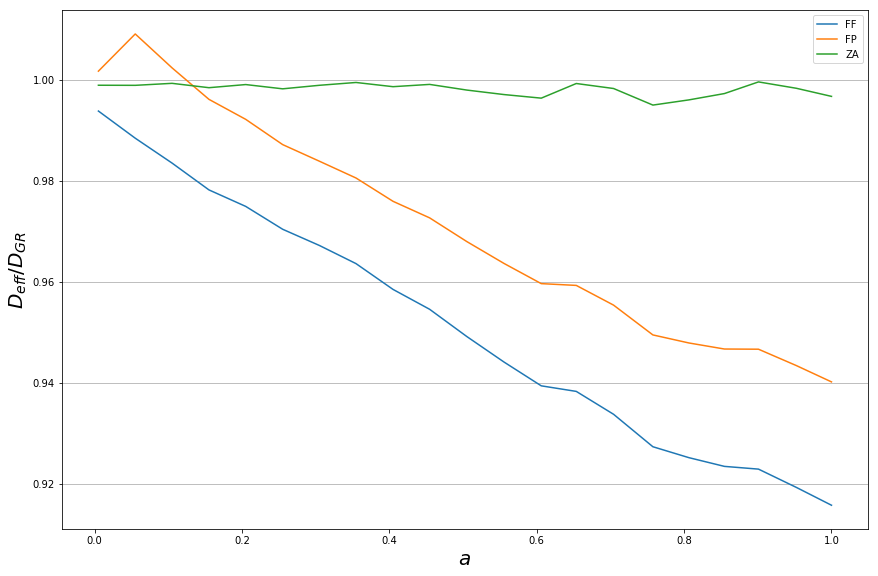

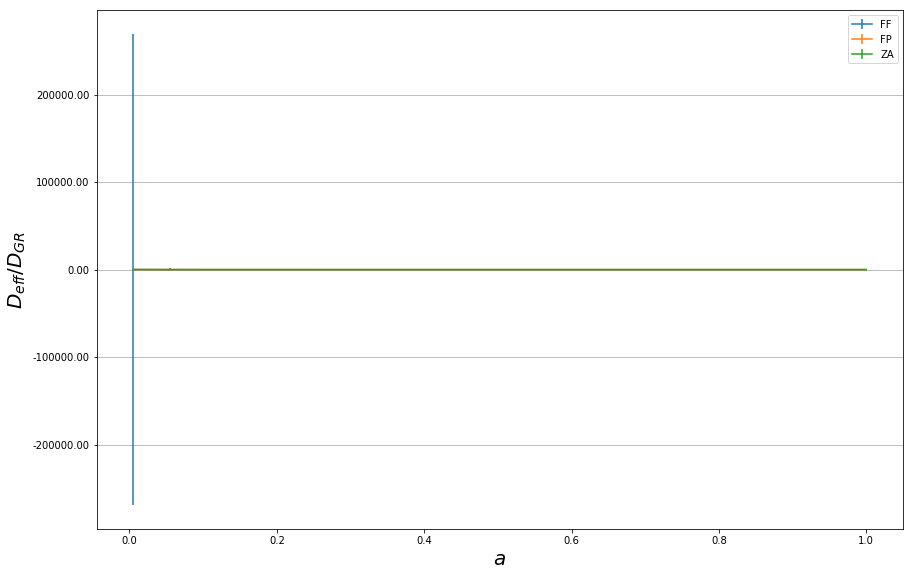

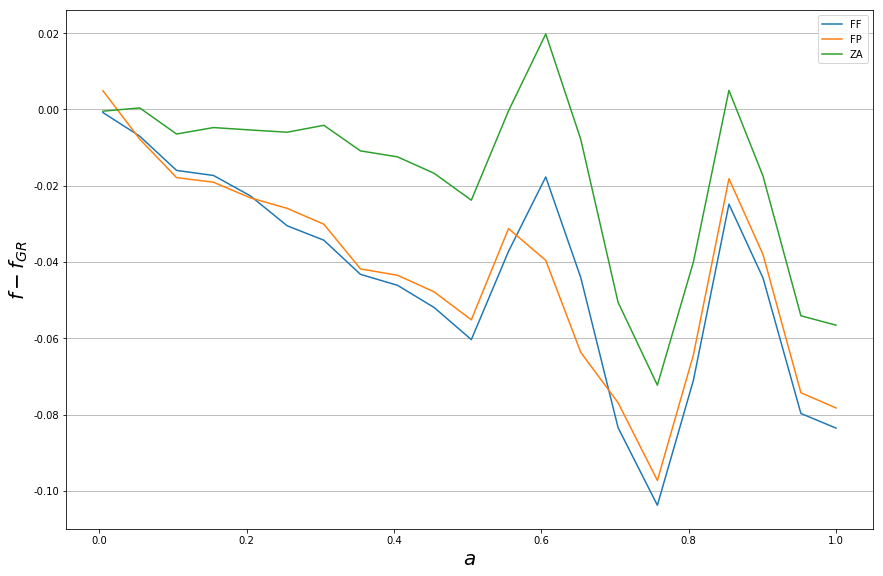

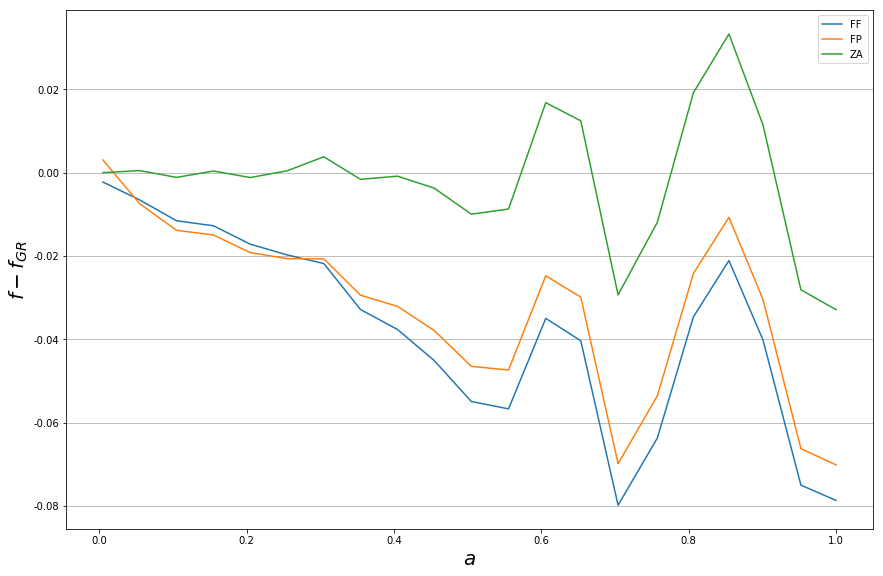

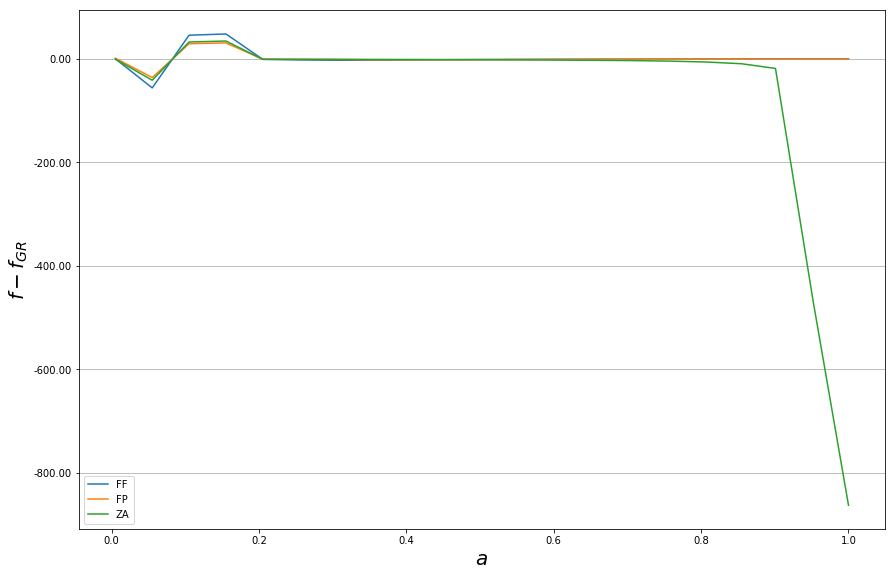

In [11]:
non_chi_stack_infos = results.get_subfiles(NM=1024, L=2000, app_not='CHI')
for si in non_chi_stack_infos:
    dt.load_a_eff(si)
pt.plot_eff_time(non_chi_stack_infos, out_dir=out_dir + 'z_eff/', a_eff_type="all", show=True)
pt.plot_eff_growth_rate(non_chi_stack_infos, out_dir=out_dir + 'z_eff/', a_eff_type="all", show=True)

## Non-linear matter power spectrum
1. stack simulations across different runs (different box sizes)
2. use effective redshift
3. plot power spectrum difference
4. plot power spectrum map
5. amplitude of non-linear power spectrum

FP


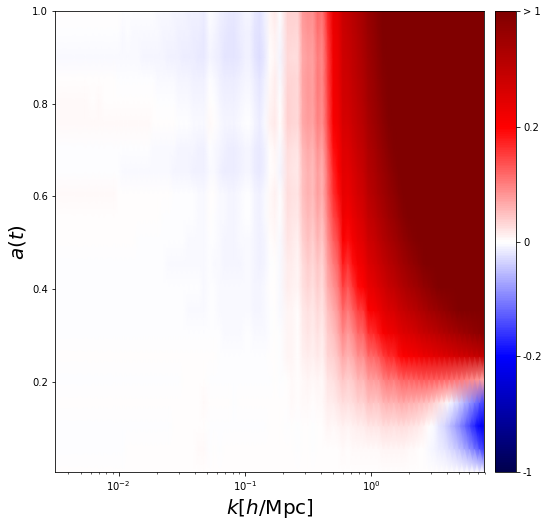

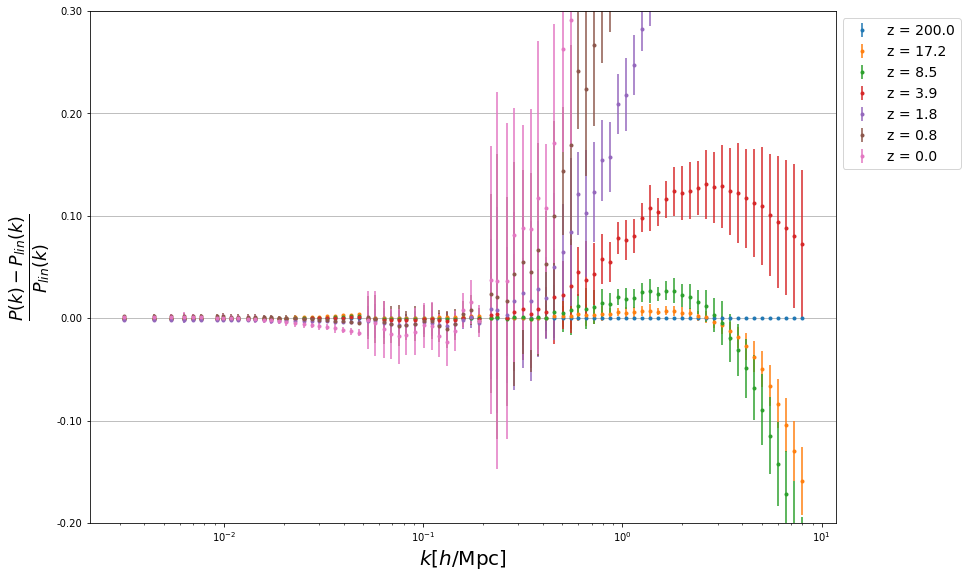

ZA


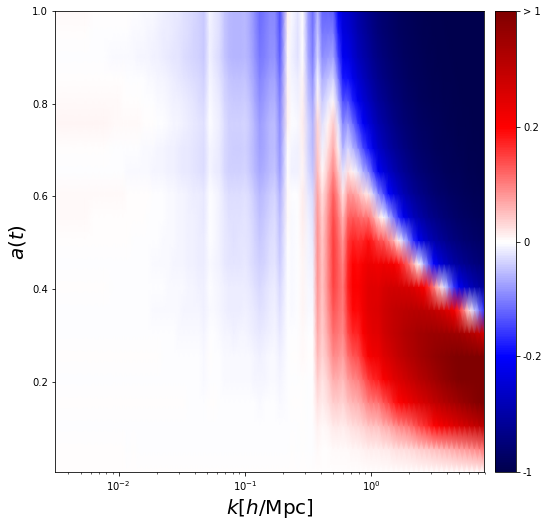

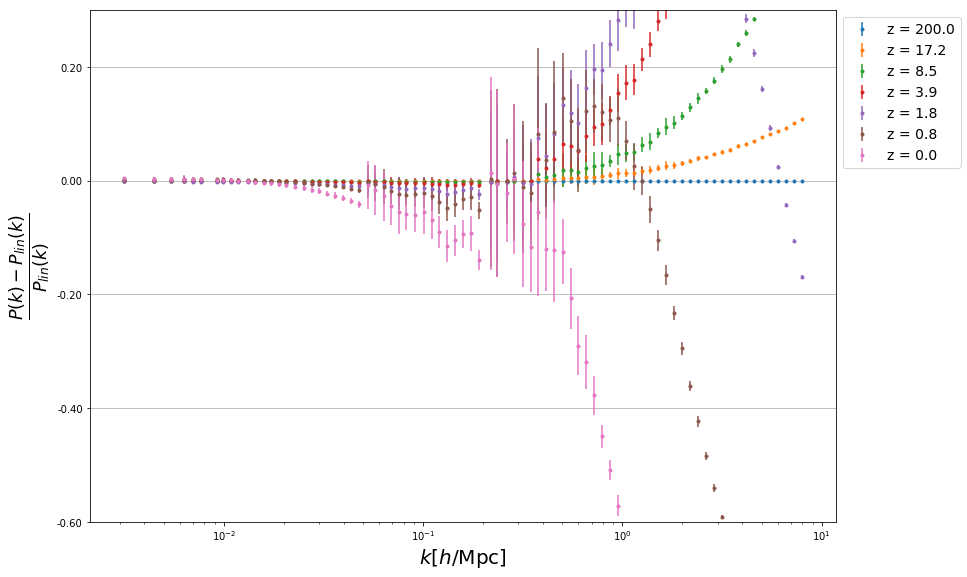

FF


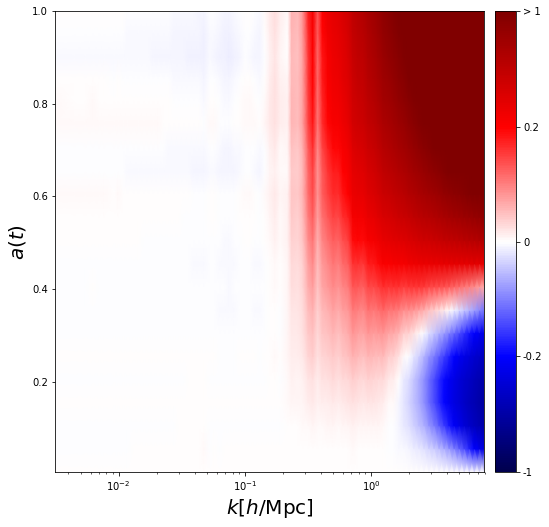

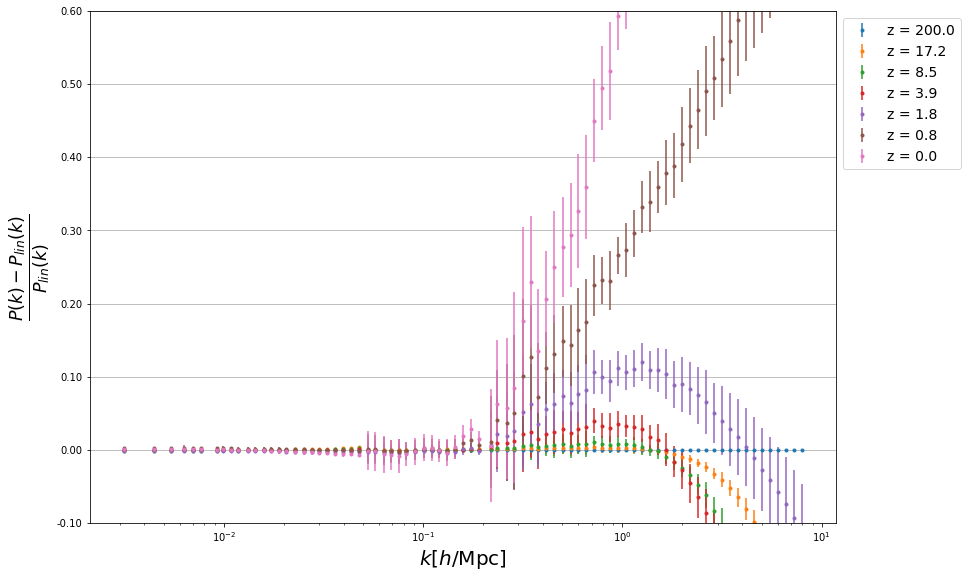

In [12]:
# non_chi_stack_infos = results.get_subfiles(NM=1024,  app_not='CHI')
# for si in non_chi_stack_infos:
#     print si.info_tr()
#     zs, data_array = dt.transform_supp_data_to_z_eff(si)
#     pt.plot_pwr_spec_diff_from_data(data_array, zs, si, show_scales=False, save=False, show=True, use_z_eff=True)
#     pt.plot_pwr_spec_diff_map_from_data(data_array, zs, si, save=False, show=True, use_z_eff=True)
non_chi_stack_infos = results.get_subfiles(NM=1024, app_not='CHI')
dt.get_plot_mlt_pk_diff_broad(non_chi_stack_infos, out_dir=out_dir + 'pwr_spec_nl/')

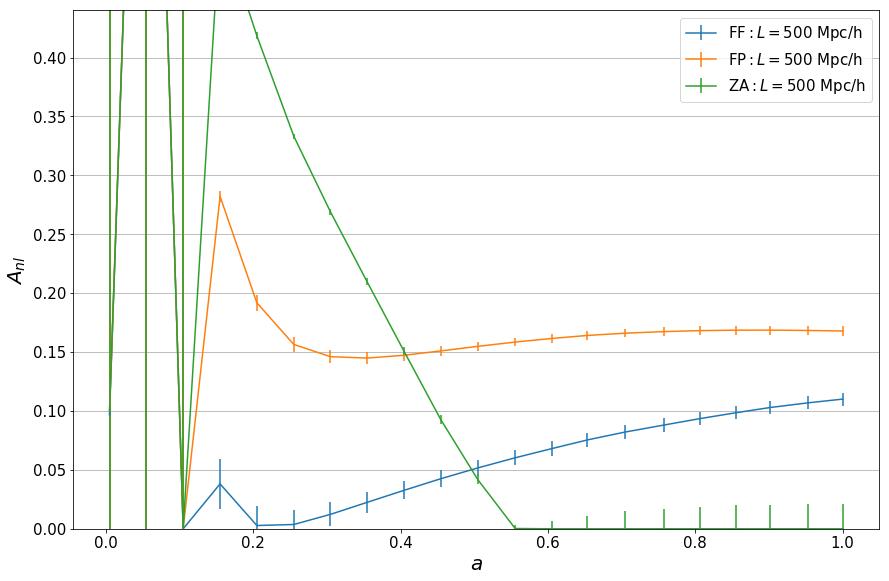

In [29]:
non_chi_stack_infos = results.get_subfiles(NM=1024, L=500,  app_not='CHI')
for si in non_chi_stack_infos:
    dt.get_pk_nl_amp(si)
    
pt.plot_pwr_spec_nl_amp(non_chi_stack_infos, out_dir=out_dir + 'pwr_spec_nl/', show=True)

## Correlation function
1. simple correlation function (all approximation)
2. correlation function difference (all approximation)
3. correlation function peak amplitude and location (effective time)

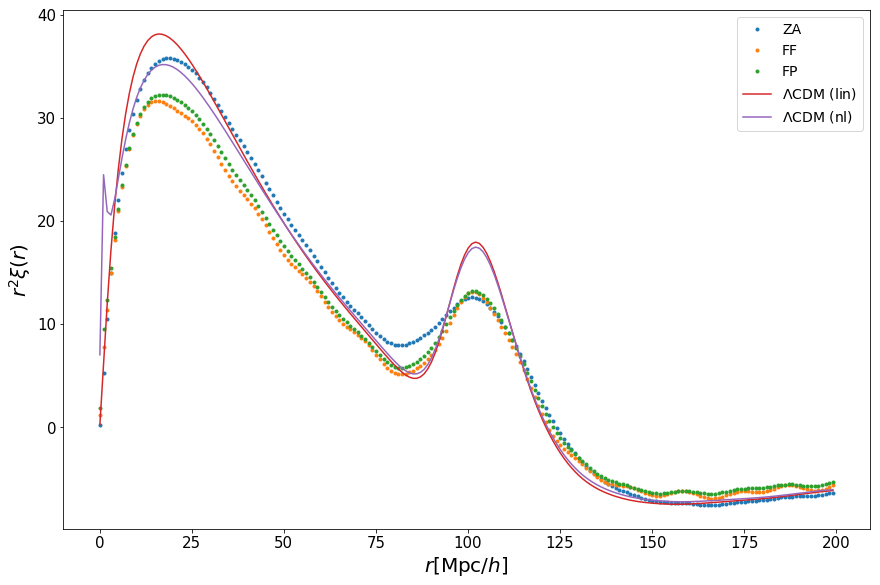

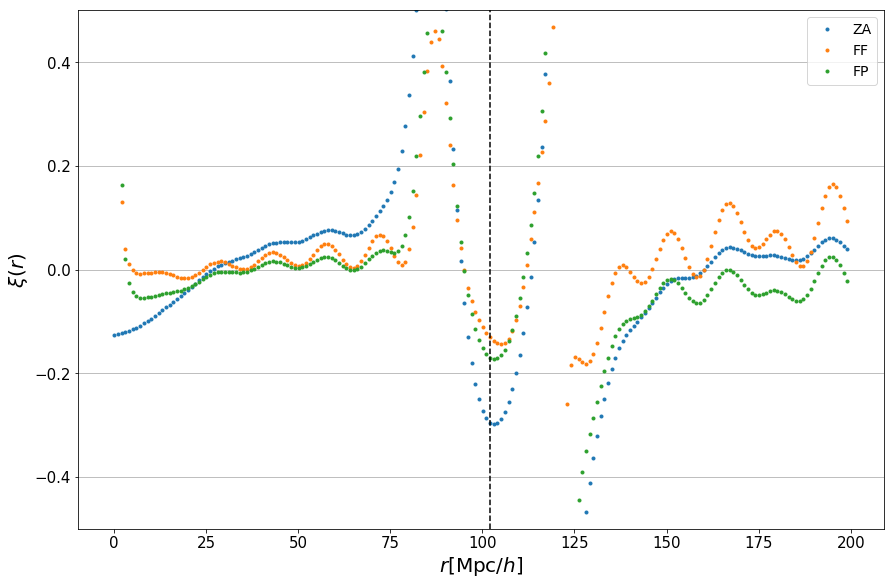

In [26]:
non_chi_stack_infos = results.get_subfiles(NM=1024, L=2000, app_not='CHI')
dt.corr_func_comp_plot(sim_infos=non_chi_stack_infos, outdir=out_dir + 'corr_func/', z=0)

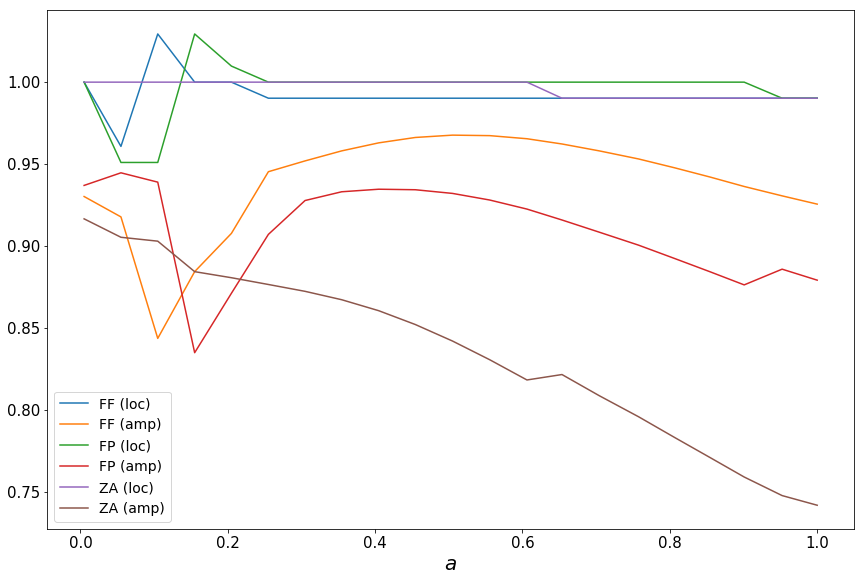

In [22]:
non_chi_stack_infos = results.get_subfiles(NM=1024, L=2000, app_not='CHI')
dt.corr_func_comp_plot_peak(sim_infos=non_chi_stack_infos, outdir=out_dir + 'corr_func/')

## Chameleon results

In [13]:
# results = Results(in_dir)
results.info(app='CHI', L=100)

CHI:  N_m = 512  N_M = 1024  N_p = 512^3  L = 100 Mpc/h  \phi_s = 1.0e-05   n = 0.5  (nl) 	num runs = 19
CHI:  N_m = 512  N_M = 1024  N_p = 512^3  L = 100 Mpc/h  \phi_s = 1.0e-05   n = 0.5  (lin)	num runs = 20


In [48]:
dt.stack_group(group_sim_infos=stack_infos[1], rerun='bao')

step: pwr_spec_files           [Skipped]  (already done)
step: pwr_spec_chi_files       [Skipped]  (missing data)
step: pwr_diff_files (particle)[Skipped]  (already done)
step: pwr_diff_files_h (hybrid)[Skipped]  (already done)
step: pwr_diff_files_i (input) [Skipped]  (already done)
step: pwr_spec                 [Skipped]  (already done)
step: pwr_spec_chi             [Skipped]  (missing data)
step: pwr_slope                [Skipped]  (already done)
step: pwr_diff (particle)      [Skipped]  (already done)
step: pwr_diff_h (hybrid)      [Skipped]  (already done)
step: pwr_diff_i (input)       [Skipped]  (already done)
step: chi_pwr_diff             [Skipped]  (missing data)
step: corr_func                [Skipped]  (already done)
step: bao                      zs:  [200.0, 17.19, 8.53, 5.45, 3.88, 2.92, 2.28, 1.82, 1.47, 1.2, 0.98, 0.8, 0.65, 0.53, 0.42, 0.32, 0.24, 0.17, 0.11, 0.05, 0.0] 
a:  [] 

zs:  [200.0, 17.19, 8.53, 5.45, 3.88, 2.92, 2.28, 1.82, 1.47, 1.2, 0.98, 0.8, 0.65, 0.5

In [49]:
zs = [200.0, 17.19, 8.53, 5.45, 3.88, 2.92, 2.28, 1.82, 1.47, 1.2, 0.98, 0.8, 0.65, 0.53, 0.42, 0.32, 0.24, 0.17, 0.11, 0.05, 0.0] 

In [53]:
zs[slice(0, None)]

[200.0,
 17.19,
 8.53,
 5.45,
 3.88,
 2.92,
 2.28,
 1.82,
 1.47,
 1.2,
 0.98,
 0.8,
 0.65,
 0.53,
 0.42,
 0.32,
 0.24,
 0.17,
 0.11,
 0.05,
 0.0]